In [1]:
function mod_new(n,N)
    if n == 0
        return 1
    elseif n%N == 0
        return n
    else
        return n%N
    end
end

mod_new (generic function with 1 method)

In [2]:
function energy(M)
    J::Float64 = 1.0
    N::Int64 = size(M)[1]

    E::Float64 = 0

    for i=1:N
        E += M[mod_new(i,N)]*M[mod_new(i+1,N)]
    end

    return -J*(E)
end


energy (generic function with 1 method)

In [3]:
function magnetization(M)
    m = 0
    for i=1:size(M)[1]
        m+=M[i]
    end
    return abs(m)
end


magnetization (generic function with 1 method)

In [46]:
function monte(M, T)
    N = size(M)[1]
    
    time_steps = 10^3
    
    for i = 1:time_steps
        a = rand((1:N)) #random number
        spin = M[a]
        neighbours = M[mod_new((a+1),N)] + M[mod_new((a-1),N)]
        dE = 2*spin*neighbours
        #dE = del_E_1(M,a)
        
        tent = minimum([1.0, exp(-dE/T)])
        
        prob = rand() # rand no between 0 1 uniformly distributed
        
        if tent > prob
            spin = -1*spin
        else
            spin = spin
        
        end
        M[a] = spin
        
    end
    return M
end


monte (generic function with 1 method)

In [83]:
Pts = 60 #no. of points on Energy-Temp graph

temp_array = LinRange(0.001,1.6,Pts)
Erg_array = zeros(Pts,1) #LinRange(0.001,5,Pts)
Mag_array = zeros(Pts,1) #LinRange(0.001,5,Pts)


60×1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [79]:
function main()
    for i=1:Pts
        print(i, " ")
        lat_len = 100 #size of lattice
        N = 10 #??
        Lat = rand((-1,1),lat_len)
        magn_cal = 0
        erg_cal = 0
        #for k=1:2^N-2
            #Lat = monte(Lat,temp_array[i])
        #end
        for j=1:2^N
            Lat = monte(Lat,temp_array[i])
            magn_cal+=magnetization(Lat)/2^N
            erg_cal+=energy(Lat)/2^N
        end
        Mag_array[i] = magn_cal/(lat_len)
        Erg_array[i] = erg_cal/(lat_len)
    end
    return Mag_array,Erg_array
end

main (generic function with 1 method)

In [80]:
using PyPlot
#Ts = range(0.1, 1.5, length=100)
#exact_C(T) = 1/(T * cosh(1/T))^2
exact_C(T) = -tanh(1/T)
tent_C(T) = tanh(T)


tent_C (generic function with 1 method)

In [84]:
M_arra, E_arra = main()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

([0.941953125; 0.9621484375; … ; 0.14673828125; 0.14892578125], [-0.9967578125; -0.997265625; … ; -0.5590234375; -0.557734375])

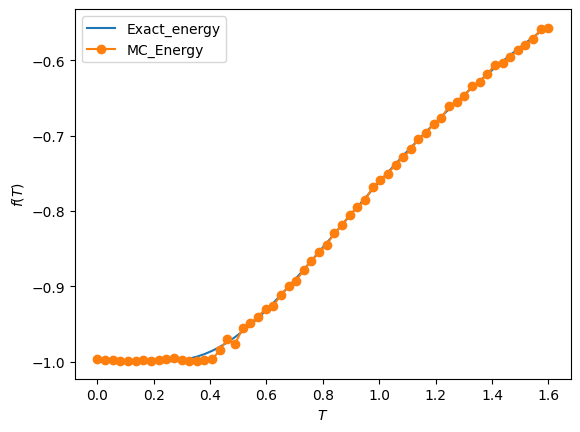

PyObject <matplotlib.legend.Legend object at 0x7fb77eeff370>

In [85]:
Ts = temp_array
plt.plot(Ts, exact_C.(Ts), label="Exact_energy")
#plt.plot(Ts, tent_C.(Ts), label="Exact_energy")


plt.plot(temp_array, E_arra, label="MC_Energy", marker="o")
#plt.plot(temp_array, M_arra, label="MC_Magnetization", marker="v")

plt.xlabel(raw"$T$")
plt.ylabel(raw"$f(T)$")
#plt.xlim([0, nothing])
#plt.ylim([0, nothing])
plt.legend()
